## Keras and TensorFlow

In this assignment, we will learn about Keras and TensorFlow. We will create a neural network and measure the model's performance.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/breast_cancer.csv')

In [ ]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


We'll start with some data cleaning. First remove the id column since we have no use for it. Then check for missing data and remove all rows containing missing data.

In [ ]:
# Answer below:
#removing id column
cancer.drop(['id'], axis=1, inplace=True)

#checking for missing data
cancer.info() 
#no nulls -- cancer.isnull().sum()   / cancer.isnull().count() -- gives percentage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

The diagnosis columnn is our target variable. How many possible values are in this variable?

In [ ]:
# Answer below:
#'diagnosis' = target
cancer.diagnosis.value_counts()

#either B (benign) or M (malignant) 

B    357
M    212
Name: diagnosis, dtype: int64

Create one or multiple dummy variables for this column and store this encoded data in a numpy array called `target`

In [ ]:
# Answer below:
cancer['target'] = cancer['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
cancer.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,1
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,1
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,1
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,1
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,1
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,1


When looking at the columm names, you may have noticed that for each attribute we have a mean of the attribute, a standard error, and a worst value. Let's create a list of column names for only the means columns. Use this list to create a new dataframe containing only the means columns.

In [ ]:
# Answer below:
means = cancer.filter(like='_mean')
print(means.shape)
means.head()

(569, 10)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Split the data into train and test samples. The test sample should contain 20% of the data.

In [ ]:
# Answer below
from sklearn.model_selection import train_test_split
#column target = binary diagnosis
X = means
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we'll use the minmax scaler to ensure that all columns have values between zero and 1. Apply this transformations for all columns to be used in the prediction.

In [ ]:
# Answer below:
#minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

Now we can proceed with our model. In the cell below, import the `Sequential`, and `Dense` functions.

In [ ]:
# Answer below:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

create a model that takes the training data and predicts the target variable. The model will have 3 layers. The input layer should be of unit size 12 and the hidden layer will be of size 10. The output layer size will be determined by the size of the target variable. Use the sigmoid activation function for the last layer

In [ ]:
X_train_scale.shape[1]

10

In [ ]:
# Answer below
#3 layers -- input = 23 ; hidden = 10
#sigmoid activation last layer

model = Sequential()
#first
model.add(Dense(12, input_dim=X_train_scale.shape[1], activation='relu'))
#second
model.add(Dense(10, activation='relu'))
#last/output
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Use the adam optimizer and the binary crossentropy loss function. Train the model for 200 epochs with a batch size of 80. Make sure touse the test data into the model as well.

In [ ]:
# Answer below:
#opt='adam'
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#fit model
model.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), 
          batch_size=80, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 1s 40ms/step - loss: 0.6696 - accuracy: 0.8480 - val_loss: 0.6652 - val_accuracy: 0.8596
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6640 - accuracy: 0.8651 - val_loss: 0.6607 - val_accuracy: 0.8333
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6575 - accuracy: 0.8728 - val_loss: 0.6563 - val_accuracy: 0.8333
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6521 - accuracy: 0.8803 - val_loss: 0.6516 - val_accuracy: 0.8246
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6483 - accuracy: 0.8689 - val_loss: 0.6464 - val_accuracy: 0.8246
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.6426 - accuracy: 0.8574 - val_loss: 0.6408 - val_accuracy: 0.8246
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 0.6358 - accuracy: 0.8803 - val_loss: 0.6349 - val_accuracy: 0.8246
Epoch 8/200
6/6 [=========

Report the accuracy of the test sample.

In [ ]:
# Answer below:
model.evaluate(X_test_scale, y_test)[1]

4/4 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9386


0.9385964870452881

In [ ]:
history = model.fit(X_train_scale, y_train, validation_data=(X_test_scale, y_test), 
          batch_size=80, epochs=200, verbose=0)
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.116771,0.956044,0.197446,0.938596
1,0.117227,0.958242,0.198835,0.938596
2,0.116901,0.958242,0.197704,0.938596
3,0.116741,0.958242,0.195555,0.929825
4,0.116953,0.949451,0.195050,0.929825


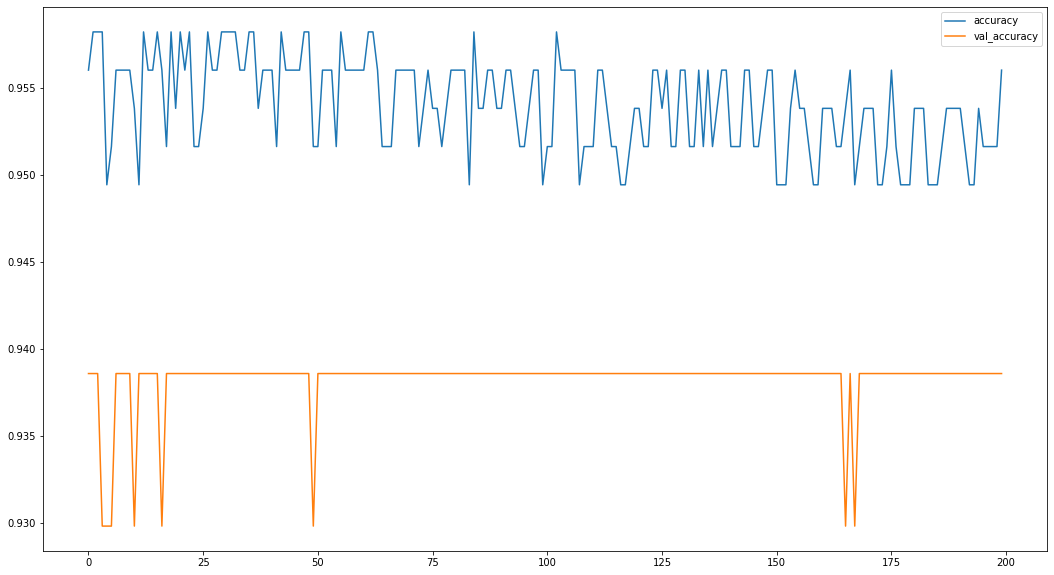

In [ ]:
df[['accuracy', 'val_accuracy']].plot(figsize=(18,10))